In [139]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/widsdatathon2025/SAMPLE_SUBMISSION.xlsx
/kaggle/input/widsdatathon2025/Data Dictionary.xlsx
/kaggle/input/widsdatathon2025/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv
/kaggle/input/widsdatathon2025/TEST/TEST_CATEGORICAL.xlsx
/kaggle/input/widsdatathon2025/TEST/TEST_QUANTITATIVE_METADATA.xlsx
/kaggle/input/widsdatathon2025/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv
/kaggle/input/widsdatathon2025/TRAIN/TRAINING_SOLUTIONS.xlsx
/kaggle/input/widsdatathon2025/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx
/kaggle/input/widsdatathon2025/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx


In [140]:
sample_submission_xsxl = pd.read_excel("/kaggle/input/widsdatathon2025/SAMPLE_SUBMISSION.xlsx")
sample_submission_xsxl

,participant_id,ADHD_Outcome,Sex_F
0,Cfwaf5FX7jWK,1,0
1,vhGrzmvA3Hjq,0,0
2,ULliyEXjy4OV,0,1
3,LZfeAb1xMtql,1,0
4,EnFOUv0YK1RG,1,0
...,...,...,...
299,UadZfjdEg7eG,1,0
300,IUEHiLmQAqCi,1,1
301,cRySmCadYFRO,1,0
302,E3MvDUtJadc5,1,0


In [141]:
sample_submission_xsxl.shape

(304, 3)

In [142]:
sample_submission_xsxl.columns

Index(['participant_id', 'ADHD_Outcome', 'Sex_F'], dtype='object')

In [143]:
sample_submission_xsxl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   participant_id  304 non-null    object
 1   ADHD_Outcome    304 non-null    int64 
 2   Sex_F           304 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [144]:
sample_submission_xsxl.describe()

,ADHD_Outcome,Sex_F
count,304.000000,304.000000
mean,0.546053,0.509868
std,0.498696,0.500727
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [145]:
data_dict_xlsx = pd.read_excel("/kaggle/input/widsdatathon2025/Data Dictionary.xlsx")
data_dict_xlsx

,DataType,Instrument,Field,Description,Type,Labels
0,QUANTITATIVE METADATA,NaN,NaN,NaN,NaN,NaN
1,NaN,Identifier,participant_id,Participant ID,str,NaN
2,Quantitative,Edinburgh Handedness Questionnaire,EHQ_EHQ_Total,Laterality Index (Score),float,-100 = 10th left\n−28 ≤ LI < 48 = middle\n100 ...
3,Quantitative,Ishihara Color Vision Test,ColorVision_CV_Score,Color vision test score,int,NaN
4,Quantitative,Alabama Parenting Questionnaire - Parent Report,APQ_P_APQ_P_CP,Corporal Punishment Score,int,NaN
5,Quantitative,Alabama Parenting Questionnaire - Parent Report,APQ_P_APQ_P_ID,Inconsistent Discipline Score,int,NaN
6,Quantitative,Alabama Parenting Questionnaire - Parent Report,APQ_P_APQ_P_INV,Involvement Score,int,NaN
7,Quantitative,Alabama Parenting Questionnaire - Parent Report,APQ_P_APQ_P_OPD,Other Discipline Practices Score (Not factored...,int,NaN
8,Quantitative,Alabama Parenting Questionnaire - Parent Report,APQ_P_APQ_P_PM,Poor Monitoring/Supervision Score,int,NaN
9,Quantitative,Alabama Parenting Questionnaire - Parent Report,APQ_P_APQ_P_PP,Positive Parenting Score,int,NaN


In [146]:
data_dict_xlsx.shape

(37, 6)

In [147]:
data_dict_xlsx.columns

Index(['DataType', 'Instrument', 'Field', 'Description', 'Type', 'Labels'], dtype='object')

In [148]:
data_dict_xlsx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DataType     32 non-null     object
 1   Instrument   31 non-null     object
 2   Field        31 non-null     object
 3   Description  31 non-null     object
 4   Type         31 non-null     object
 5   Labels       11 non-null     object
dtypes: object(6)
memory usage: 1.9+ KB


In [149]:
data_dict_xlsx.describe()

,DataType,Instrument,Field,Description,Type,Labels
count,32,31,31,31,31,11
unique,6,11,30,30,4,9
top,Quantitative,Strength and Difficulties Questionnaire,participant_id,Participant ID,int,"0=Homemaker, stay at home parent.\n5=Day labor..."
freq,18,9,2,2,17,2


In [150]:
test_func_connect_matrix_csv = pd.read_csv("/kaggle/input/widsdatathon2025/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv")
test_func_connect_matrix_csv

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,Cfwaf5FX7jWK,0.548480,0.713607,0.557319,0.524369,0.693364,0.770032,0.724406,0.390118,0.547912,...,0.080423,-0.054581,-0.088163,-0.028574,0.444847,0.350149,-0.012601,0.665750,0.560565,0.555732
1,vhGrzmvA3Hjq,0.427740,0.363022,0.402862,0.363003,0.534558,0.345347,0.409471,0.303328,0.402515,...,0.198009,-0.000724,0.083122,0.033043,0.687497,0.306229,0.717485,0.461809,0.559632,0.350027
2,ULliyEXjy4OV,0.139572,0.390106,-0.087041,0.196852,0.088148,0.023843,0.381782,0.068979,0.377488,...,0.051319,0.023630,-0.056819,0.117396,0.576086,0.517831,0.527044,0.605038,0.609856,0.750987
3,LZfeAb1xMtql,0.133561,0.778326,0.416355,0.471840,0.568460,0.633660,0.501113,0.345461,0.467943,...,0.046183,-0.238962,0.121868,-0.260970,0.646818,0.594902,0.608156,0.595459,0.683189,0.542296
4,EnFOUv0YK1RG,0.126699,0.575446,0.509422,0.363193,0.427544,0.449924,0.451796,0.223927,0.298248,...,0.315734,0.002234,0.290791,0.344149,0.480214,0.539824,0.447322,0.293088,0.148529,0.539823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,UadZfjdEg7eG,0.029721,0.596742,0.361898,0.292066,0.553130,0.476284,0.543970,0.372932,0.595183,...,0.021524,-0.162832,0.105546,0.028975,0.576180,0.378365,0.399277,0.556115,0.490833,0.568742
300,IUEHiLmQAqCi,0.025985,0.347840,0.304804,0.463090,0.305321,0.267397,0.468712,0.155677,0.298155,...,0.044974,-0.078047,-0.118271,0.035741,0.640073,0.515096,0.206462,0.536001,0.318518,0.305596
301,cRySmCadYFRO,0.105385,0.443624,-0.019777,0.435582,0.376492,0.619322,0.430177,0.567600,0.399820,...,0.145582,0.004455,0.134574,-0.152951,0.782938,0.737555,0.593972,0.734463,0.680979,0.678973
302,E3MvDUtJadc5,0.345641,0.758986,0.748153,0.442141,0.571924,0.485011,0.530513,0.137672,0.467144,...,0.036169,-0.345563,-0.165280,-0.347035,0.657024,0.590523,0.094565,0.727339,0.429694,0.530238


In [151]:
test_func_connect_matrix_csv.shape

(304, 19901)

In [152]:
test_func_connect_matrix_csv.columns

Index(['participant_id', '0throw_1thcolumn', '0throw_2thcolumn',
       '0throw_3thcolumn', '0throw_4thcolumn', '0throw_5thcolumn',
       '0throw_6thcolumn', '0throw_7thcolumn', '0throw_8thcolumn',
       '0throw_9thcolumn',
       ...
       '195throw_196thcolumn', '195throw_197thcolumn', '195throw_198thcolumn',
       '195throw_199thcolumn', '196throw_197thcolumn', '196throw_198thcolumn',
       '196throw_199thcolumn', '197throw_198thcolumn', '197throw_199thcolumn',
       '198throw_199thcolumn'],
      dtype='object', length=19901)

In [153]:
test_func_connect_matrix_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Columns: 19901 entries, participant_id to 198throw_199thcolumn
dtypes: float64(19900), object(1)
memory usage: 46.2+ MB


In [154]:
test_func_connect_matrix_csv.describe()

,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,0throw_10thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
count,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,...,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000
mean,0.219970,0.610695,0.419458,0.395230,0.480795,0.530394,0.496573,0.287560,0.413862,0.244862,...,0.049241,-0.055612,-0.015886,0.022734,0.558894,0.353789,0.380367,0.503837,0.487597,0.557431
std,0.249959,0.163408,0.248612,0.244413,0.256404,0.167916,0.178327,0.201606,0.196153,0.218831,...,0.199660,0.225587,0.215424,0.206935,0.156629,0.203452,0.195547,0.170680,0.183347,0.173604
min,-0.713362,-0.118109,-0.376194,-0.379673,-0.379396,-0.022415,-0.113225,-0.516528,-0.195773,-0.555761,...,-0.363454,-0.501310,-0.570880,-0.479486,0.000000,-0.201091,-0.213887,-0.040523,-0.199617,-0.168106
25%,0.059497,0.511165,0.243170,0.267692,0.344056,0.424307,0.379608,0.159488,0.287149,0.089417,...,-0.093097,-0.227949,-0.164278,-0.128828,0.479489,0.235322,0.264928,0.401851,0.377687,0.456239
50%,0.219107,0.634942,0.453220,0.442026,0.539100,0.539635,0.524052,0.322734,0.426979,0.268674,...,0.037098,-0.077162,-0.014110,0.006236,0.577125,0.374062,0.404230,0.539822,0.502269,0.581648
75%,0.396008,0.727476,0.605324,0.561536,0.671823,0.652488,0.624549,0.429456,0.571971,0.411791,...,0.179494,0.100244,0.126558,0.154479,0.662010,0.508747,0.528825,0.627340,0.616772,0.682909
max,0.778206,0.904572,0.875906,0.915949,0.914515,0.920882,0.921036,0.887702,0.907231,0.877371,...,0.737060,0.681016,0.781968,0.809705,0.874170,0.780386,0.765132,0.859924,0.820123,0.872319


In [155]:
test_catagorical_xlsx = pd.read_excel("/kaggle/input/widsdatathon2025/TEST/TEST_CATEGORICAL.xlsx")
test_catagorical_xlsx

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,Cfwaf5FX7jWK,2022,4,0.0,0.0,4,21.0,30.0,18.0,30.0
1,vhGrzmvA3Hjq,2023,4,0.0,0.0,4,21.0,45.0,NaN,30.0
2,ULliyEXjy4OV,2022,4,0.0,0.0,4,21.0,40.0,18.0,40.0
3,LZfeAb1xMtql,2022,4,0.0,0.0,3,21.0,45.0,21.0,45.0
4,EnFOUv0YK1RG,2022,4,2.0,0.0,4,18.0,0.0,21.0,45.0
...,...,...,...,...,...,...,...,...,...,...
299,UadZfjdEg7eG,2023,4,0.0,0.0,4,18.0,0.0,18.0,35.0
300,IUEHiLmQAqCi,2023,4,0.0,1.0,3,18.0,35.0,21.0,40.0
301,cRySmCadYFRO,2023,4,0.0,8.0,4,21.0,25.0,15.0,NaN
302,E3MvDUtJadc5,2022,4,0.0,8.0,4,21.0,0.0,21.0,45.0


In [156]:
test_catagorical_xlsx.shape

(304, 10)

In [157]:
test_catagorical_xlsx.columns

Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ'],
      dtype='object')

In [158]:
test_catagorical_xlsx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    304 non-null    object 
 1   Basic_Demos_Enroll_Year           304 non-null    int64  
 2   Basic_Demos_Study_Site            304 non-null    int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  301 non-null    float64
 4   PreInt_Demos_Fam_Child_Race       298 non-null    float64
 5   MRI_Track_Scan_Location           304 non-null    int64  
 6   Barratt_Barratt_P1_Edu            303 non-null    float64
 7   Barratt_Barratt_P1_Occ            303 non-null    float64
 8   Barratt_Barratt_P2_Edu            268 non-null    float64
 9   Barratt_Barratt_P2_Occ            262 non-null    float64
dtypes: float64(6), int64(3), object(1)
memory usage: 23.9+ KB


In [159]:
test_catagorical_xlsx.describe()

,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
count,304.000000,304.000000,301.000000,298.000000,304.000000,303.000000,303.000000,268.000000,262.000000
mean,2022.197368,4.009868,0.355482,2.231544,3.638158,19.128713,29.389439,18.458955,35.763359
std,0.494718,0.099012,0.665741,3.392914,0.481326,2.680553,16.484193,3.087093,11.978162
min,2019.000000,4.000000,0.000000,0.000000,3.000000,3.000000,0.000000,3.000000,0.000000
25%,2022.000000,4.000000,0.000000,0.000000,3.000000,18.000000,25.000000,18.000000,30.000000
50%,2022.000000,4.000000,0.000000,0.000000,4.000000,21.000000,35.000000,18.000000,40.000000
75%,2022.000000,4.000000,1.000000,3.000000,4.000000,21.000000,45.000000,21.000000,45.000000
max,2023.000000,5.000000,3.000000,11.000000,4.000000,21.000000,45.000000,21.000000,45.000000


In [160]:
test_quantitive_metadata = pd.read_excel("/kaggle/input/widsdatathon2025/TEST/TEST_QUANTITATIVE_METADATA.xlsx")
test_quantitive_metadata

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,Cfwaf5FX7jWK,60.03,14.0,5.0,16.0,41.0,19.0,11.0,26.0,2.0,12.0,3.0,9.0,2.0,7.0,3.0,0.0,8.0,8.992813
1,vhGrzmvA3Hjq,86.71,12.0,3.0,13.0,43.0,18.0,15.0,28.0,2.0,16.0,8.0,5.0,7.0,3.0,11.0,3.0,9.0,12.324093
2,ULliyEXjy4OV,26.68,13.0,3.0,14.0,36.0,16.0,14.0,25.0,1.0,7.0,1.0,6.0,1.0,5.0,1.0,0.0,9.0,7.770933
3,LZfeAb1xMtql,93.38,13.0,3.0,19.0,41.0,17.0,18.0,27.0,4.0,15.0,4.0,10.0,8.0,6.0,5.0,1.0,6.0,9.304814
4,EnFOUv0YK1RG,-93.38,14.0,3.0,13.0,42.0,19.0,16.0,28.0,2.0,18.0,6.0,12.0,5.0,10.0,6.0,0.0,10.0,8.261350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,UadZfjdEg7eG,86.71,14.0,3.0,17.0,41.0,17.0,11.0,25.0,1.0,18.0,7.0,7.0,5.0,6.0,11.0,4.0,7.0,7.546999
300,IUEHiLmQAqCi,73.37,14.0,5.0,12.0,38.0,22.0,9.0,29.0,2.0,16.0,2.0,11.0,5.0,9.0,5.0,3.0,8.0,10.531143
301,cRySmCadYFRO,87.84,13.0,3.0,14.0,42.0,15.0,10.0,28.0,1.0,11.0,4.0,4.0,4.0,3.0,7.0,3.0,10.0,7.210586
302,E3MvDUtJadc5,46.76,14.0,3.0,16.0,43.0,18.0,12.0,22.0,5.0,21.0,2.0,10.0,6.0,5.0,11.0,9.0,0.0,12.212183


In [161]:
test_quantitive_metadata.shape

(304, 19)

In [162]:
test_quantitive_metadata.columns

Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan'],
      dtype='object')

In [163]:
test_quantitive_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   participant_id              304 non-null    object 
 1   EHQ_EHQ_Total               303 non-null    float64
 2   ColorVision_CV_Score        295 non-null    float64
 3   APQ_P_APQ_P_CP              289 non-null    float64
 4   APQ_P_APQ_P_ID              289 non-null    float64
 5   APQ_P_APQ_P_INV             289 non-null    float64
 6   APQ_P_APQ_P_OPD             289 non-null    float64
 7   APQ_P_APQ_P_PM              289 non-null    float64
 8   APQ_P_APQ_P_PP              289 non-null    float64
 9   SDQ_SDQ_Conduct_Problems    274 non-null    float64
 10  SDQ_SDQ_Difficulties_Total  274 non-null    float64
 11  SDQ_SDQ_Emotional_Problems  274 non-null    float64
 12  SDQ_SDQ_Externalizing       274 non-null    float64
 13  SDQ_SDQ_Generating_Impact   274 non

In [164]:
test_quantitive_metadata.describe()

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
count,303.000000,295.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,304.000000
mean,59.144488,13.240678,3.321799,13.259516,39.633218,16.726644,15.944637,24.826990,1.890511,11.781022,2.390511,7.474453,3.945255,5.583942,4.306569,1.916058,7.726277,11.206715
std,49.330962,1.986273,0.810248,3.627411,5.153586,3.360000,4.931163,3.283666,1.973000,6.056771,2.139131,4.122804,2.687768,2.821016,3.421676,1.997314,2.084717,3.406516
min,-100.050000,0.000000,2.000000,6.000000,20.000000,7.000000,9.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.007871
25%,50.060000,13.000000,3.000000,11.000000,36.000000,14.000000,12.000000,23.000000,0.000000,7.000000,1.000000,4.000000,2.000000,4.000000,1.000000,0.000000,6.000000,8.558207
50%,73.370000,14.000000,3.000000,13.000000,40.000000,17.000000,15.000000,25.000000,1.000000,11.000000,2.000000,7.000000,4.000000,6.000000,4.000000,1.000000,8.000000,10.246749
75%,93.380000,14.000000,3.000000,16.000000,43.000000,19.000000,19.000000,28.000000,3.000000,16.000000,4.000000,10.750000,6.000000,8.000000,7.000000,3.000000,10.000000,13.406741
max,100.050000,14.000000,8.000000,23.000000,50.000000,27.000000,31.000000,30.000000,10.000000,29.000000,10.000000,18.000000,10.000000,10.000000,15.000000,9.000000,10.000000,21.561943


In [165]:
# important
# There is also a test functional connectome
# More explroation, this is very high dimensional/reduce dimensions
# Perhaps more correlations
train_func_connect_matrix_csv = pd.read_csv("/kaggle/input/widsdatathon2025/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv")
train_func_connect_matrix_csv

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,...,0.003404,-0.010359,-0.050968,-0.014365,0.128066,0.112646,-0.058980,0.028228,0.133582,0.143372
1,WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,...,-0.008409,-0.008479,0.020891,0.017754,0.094040,0.035141,0.032537,0.075007,0.115350,0.138200
2,4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,...,0.053245,-0.028003,0.028773,0.024556,0.166343,0.058925,0.035485,0.063661,0.042862,0.162162
3,obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,...,-0.023918,-0.005356,0.018607,0.016193,0.072955,0.130135,0.056120,0.084784,0.114148,0.190584
4,s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,...,0.066439,-0.076680,-0.047530,-0.031443,0.221213,0.007343,0.005763,0.083820,0.079582,0.067269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,kTurROKp5YHQ,0.022932,0.024830,-0.006514,0.021070,0.093365,0.083369,0.010991,0.035838,0.023909,...,0.060060,-0.003911,-0.016413,0.089110,0.118587,-0.060868,0.124443,0.028510,0.113064,0.103809
1209,FCRyMz9O6yCq,0.047078,0.135955,0.144366,0.054938,0.065760,0.113550,0.032621,0.025349,0.011848,...,0.021318,0.020141,-0.020920,0.030450,0.190241,0.026461,-0.011593,0.139483,-0.064480,0.070354
1210,vm2P1hmAY1hl,0.094541,0.145280,0.061964,0.030562,0.078278,0.105857,0.043984,0.039145,0.032024,...,-0.052990,-0.002118,-0.038452,0.066608,0.143446,0.051221,0.127495,0.106242,-0.036065,0.151341
1211,OFxvN8lnw21w,-0.001533,0.128562,0.045000,-0.008742,0.003673,0.086494,0.090101,-0.037449,-0.026334,...,0.024479,-0.036995,-0.061617,-0.001699,0.106568,0.023427,-0.003520,0.174972,0.041198,0.152029


In [166]:
train_func_connect_matrix_csv.shape

(1213, 19901)

In [167]:
train_func_connect_matrix_csv.columns

Index(['participant_id', '0throw_1thcolumn', '0throw_2thcolumn',
       '0throw_3thcolumn', '0throw_4thcolumn', '0throw_5thcolumn',
       '0throw_6thcolumn', '0throw_7thcolumn', '0throw_8thcolumn',
       '0throw_9thcolumn',
       ...
       '195throw_196thcolumn', '195throw_197thcolumn', '195throw_198thcolumn',
       '195throw_199thcolumn', '196throw_197thcolumn', '196throw_198thcolumn',
       '196throw_199thcolumn', '197throw_198thcolumn', '197throw_199thcolumn',
       '198throw_199thcolumn'],
      dtype='object', length=19901)

In [168]:
train_func_connect_matrix_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Columns: 19901 entries, participant_id to 198throw_199thcolumn
dtypes: float64(19900), object(1)
memory usage: 184.2+ MB


In [169]:
train_func_connect_matrix_csv.describe()

,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,0throw_10thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,...,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,0.060553,0.122315,0.060268,0.041287,0.069722,0.091007,0.066852,0.000252,0.014128,-0.002914,...,0.011075,-0.004938,-0.004378,0.001610,0.115171,0.049984,0.058144,0.093527,0.089403,0.128946
std,0.064178,0.054026,0.057495,0.043491,0.044222,0.049189,0.046864,0.049046,0.038205,0.042462,...,0.049632,0.046536,0.042900,0.047424,0.057128,0.051664,0.057674,0.054594,0.058036,0.058490
min,-0.183279,-0.059932,-0.145566,-0.127827,-0.072043,-0.079184,-0.105722,-0.164297,-0.137728,-0.148490,...,-0.161666,-0.176523,-0.178688,-0.138048,-0.070094,-0.153540,-0.131455,-0.085566,-0.204160,-0.083077
25%,0.018482,0.086102,0.026548,0.014457,0.042462,0.057614,0.036934,-0.031358,-0.010635,-0.030538,...,-0.021376,-0.033424,-0.033798,-0.030132,0.080291,0.015827,0.022316,0.059621,0.053224,0.090459
50%,0.058276,0.123220,0.061339,0.043246,0.067066,0.086494,0.067247,0.002549,0.016130,-0.002604,...,0.010254,-0.004683,-0.003724,0.000990,0.113640,0.052705,0.059151,0.093397,0.088612,0.127913
75%,0.100103,0.154518,0.099056,0.068408,0.096504,0.119404,0.095117,0.031053,0.038770,0.024507,...,0.044165,0.024913,0.024007,0.032268,0.150524,0.082526,0.095192,0.127144,0.127613,0.166523
max,0.321522,0.390895,0.278429,0.189825,0.317500,0.316811,0.270018,0.168196,0.145364,0.128301,...,0.194616,0.183152,0.180562,0.192015,0.375635,0.228748,0.322084,0.348153,0.267162,0.414304


In [170]:
missing_values_per_column = train_func_connect_matrix_csv.isnull().sum()
print(missing_values_per_column)

participant_id          0
0throw_1thcolumn        0
0throw_2thcolumn        0
0throw_3thcolumn        0
0throw_4thcolumn        0
                       ..
196throw_198thcolumn    0
196throw_199thcolumn    0
197throw_198thcolumn    0
197throw_199thcolumn    0
198throw_199thcolumn    0
Length: 19901, dtype: int64


In [171]:
total_missing_values = train_func_connect_matrix_csv.isnull().sum().sum()
print(f"Total missing values: {total_missing_values}")

Total missing values: 0


In [172]:
training_solutions_xlsx = pd.read_excel("/kaggle/input/widsdatathon2025/TRAIN/TRAINING_SOLUTIONS.xlsx")
training_solutions_xlsx

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1
...,...,...,...
1208,Atx7oub96GXS,0,0
1209,groSbUfkQngM,0,1
1210,zmxGvIrOD0bt,0,1
1211,rOmWFuJCud5G,0,0


In [173]:
training_solutions_xlsx.shape

(1213, 3)

In [174]:
training_solutions_xlsx.columns

Index(['participant_id', 'ADHD_Outcome', 'Sex_F'], dtype='object')

In [175]:
training_solutions_xlsx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   participant_id  1213 non-null   object
 1   ADHD_Outcome    1213 non-null   int64 
 2   Sex_F           1213 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 28.6+ KB


In [176]:
training_solutions_xlsx.describe()

,ADHD_Outcome,Sex_F
count,1213.000000,1213.000000
mean,0.685078,0.342951
std,0.464676,0.474891
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [177]:
# important
# there is also a test catagorical metadata
# one hot these variables
# See if you can identify relationships between soco and adhd
train_catagorical_meta_xlsx = pd.read_excel("/kaggle/input/widsdatathon2025/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx")
train_catagorical_meta_xlsx

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0
...,...,...,...,...,...,...,...,...,...,...
1208,Atx7oub96GXS,2019,1,0.0,0,2,21,40,21,40
1209,groSbUfkQngM,2016,1,0.0,0,1,18,35,0,0
1210,zmxGvIrOD0bt,2015,1,1.0,2,1,18,20,0,0
1211,rOmWFuJCud5G,2018,3,0.0,8,3,21,40,18,45


In [178]:
train_catagorical_meta_xlsx.shape

(1213, 10)

In [179]:
train_catagorical_meta_xlsx.columns

Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ'],
      dtype='object')

In [180]:
train_catagorical_meta_xlsx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1202 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1213 non-null   int64  
 5   MRI_Track_Scan_Location           1213 non-null   int64  
 6   Barratt_Barratt_P1_Edu            1213 non-null   int64  
 7   Barratt_Barratt_P1_Occ            1213 non-null   int64  
 8   Barratt_Barratt_P2_Edu            1213 non-null   int64  
 9   Barratt_Barratt_P2_Occ            1213 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 94.9+ KB


In [181]:
train_catagorical_meta_xlsx.describe()

,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
count,1213.000000,1213.000000,1202.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,2017.652102,2.014839,0.424293,2.080791,2.288541,17.641385,24.892828,14.122012,24.719703
std,1.122522,1.135147,0.687470,3.164636,0.758348,4.004639,17.025899,7.201023,17.171113
min,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,1.000000,0.000000,0.000000,2.000000,15.000000,0.000000,12.000000,5.000000
50%,2018.000000,1.000000,0.000000,0.000000,2.000000,18.000000,30.000000,18.000000,30.000000
75%,2019.000000,3.000000,1.000000,2.000000,3.000000,21.000000,40.000000,21.000000,40.000000
max,2020.000000,4.000000,3.000000,11.000000,4.000000,21.000000,45.000000,21.000000,45.000000


In [182]:
total_missing_values = train_catagorical_meta_xlsx.isnull().sum().sum()
print(f"Total missing values: {total_missing_values}")

Total missing values: 11


In [183]:
missing_values_per_column = train_catagorical_meta_xlsx.isnull().sum()
print(missing_values_per_column)

participant_id                       0
Basic_Demos_Enroll_Year              0
Basic_Demos_Study_Site               0
PreInt_Demos_Fam_Child_Ethnicity    11
PreInt_Demos_Fam_Child_Race          0
MRI_Track_Scan_Location              0
Barratt_Barratt_P1_Edu               0
Barratt_Barratt_P1_Occ               0
Barratt_Barratt_P2_Edu               0
Barratt_Barratt_P2_Occ               0
dtype: int64


In [184]:
train_catagorical_meta_xlsx.max()

participant_id                      zwjJWCRzKhDz
Basic_Demos_Enroll_Year                     2020
Basic_Demos_Study_Site                         4
PreInt_Demos_Fam_Child_Ethnicity             3.0
PreInt_Demos_Fam_Child_Race                   11
MRI_Track_Scan_Location                        4
Barratt_Barratt_P1_Edu                        21
Barratt_Barratt_P1_Occ                        45
Barratt_Barratt_P2_Edu                        21
Barratt_Barratt_P2_Occ                        45
dtype: object

In [185]:
# important
#there is also a test quantitive metadata
# scale and normalize
train_quantitive_meta_xlsx = pd.read_excel("/kaggle/input/widsdatathon2025/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx")
train_quantitive_meta_xlsx

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,6,1,5,0,5,1,0,10,NaN
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,18,6,8,7,8,10,4,5,NaN
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,14,2,8,5,7,6,4,9,8.239904
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,24,4,16,9,10,8,4,6,NaN
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,18,4,11,4,10,7,3,9,8.940679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,Atx7oub96GXS,87.80,14,5,14,39,20,15,21,1,9,2,7,3,6,2,0,9,10.697923
1209,groSbUfkQngM,77.80,14,3,10,32,20,11,23,6,18,3,11,9,5,7,4,7,13.964750
1210,zmxGvIrOD0bt,16.68,14,3,16,28,15,19,27,3,4,1,3,0,0,1,0,10,NaN
1211,rOmWFuJCud5G,53.40,14,3,14,34,18,23,23,4,9,0,9,3,5,0,0,9,12.089094


In [186]:
# Finding the max of all the values for each column.
train_quantitive_meta_xlsx.max()

participant_id                zwjJWCRzKhDz
EHQ_EHQ_Total                        100.0
ColorVision_CV_Score                    14
APQ_P_APQ_P_CP                          12
APQ_P_APQ_P_ID                          28
APQ_P_APQ_P_INV                         50
APQ_P_APQ_P_OPD                         28
APQ_P_APQ_P_PM                          37
APQ_P_APQ_P_PP                          30
SDQ_SDQ_Conduct_Problems                10
SDQ_SDQ_Difficulties_Total              34
SDQ_SDQ_Emotional_Problems              10
SDQ_SDQ_Externalizing                   20
SDQ_SDQ_Generating_Impact               10
SDQ_SDQ_Hyperactivity                   10
SDQ_SDQ_Internalizing                   17
SDQ_SDQ_Peer_Problems                    9
SDQ_SDQ_Prosocial                       10
MRI_Track_Age_at_Scan            21.564453
dtype: object

In [187]:
train_quantitive_meta_xlsx.columns

Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan'],
      dtype='object')

In [188]:
train_quantitive_meta_xlsx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   participant_id              1213 non-null   object 
 1   EHQ_EHQ_Total               1213 non-null   float64
 2   ColorVision_CV_Score        1213 non-null   int64  
 3   APQ_P_APQ_P_CP              1213 non-null   int64  
 4   APQ_P_APQ_P_ID              1213 non-null   int64  
 5   APQ_P_APQ_P_INV             1213 non-null   int64  
 6   APQ_P_APQ_P_OPD             1213 non-null   int64  
 7   APQ_P_APQ_P_PM              1213 non-null   int64  
 8   APQ_P_APQ_P_PP              1213 non-null   int64  
 9   SDQ_SDQ_Conduct_Problems    1213 non-null   int64  
 10  SDQ_SDQ_Difficulties_Total  1213 non-null   int64  
 11  SDQ_SDQ_Emotional_Problems  1213 non-null   int64  
 12  SDQ_SDQ_Externalizing       1213 non-null   int64  
 13  SDQ_SDQ_Generating_Impact   1213 

In [189]:
train_quantitive_meta_xlsx.describe()

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,853.000000
mean,58.876917,13.164880,3.781533,13.205276,39.374279,17.785655,16.393240,25.246496,2.059357,12.122836,2.307502,7.557296,4.073372,5.497939,4.565540,2.258038,7.683430,11.245678
std,49.855501,2.780624,1.376700,3.811772,6.245928,3.764112,5.376994,3.950529,2.023322,6.577207,2.167549,4.166627,2.819731,2.836764,3.519634,2.090414,2.190295,3.234372
min,-100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.600000,14.000000,3.000000,11.000000,36.000000,16.000000,13.000000,23.000000,0.000000,7.000000,1.000000,4.000000,2.000000,4.000000,2.000000,0.000000,6.000000,8.803901
50%,76.670000,14.000000,3.000000,13.000000,40.000000,18.000000,16.000000,26.000000,2.000000,12.000000,2.000000,7.000000,4.000000,6.000000,4.000000,2.000000,8.000000,10.739219
75%,93.400000,14.000000,4.000000,16.000000,43.000000,20.000000,19.000000,28.000000,3.000000,17.000000,4.000000,10.000000,6.000000,8.000000,7.000000,4.000000,10.000000,13.460871
max,100.000000,14.000000,12.000000,28.000000,50.000000,28.000000,37.000000,30.000000,10.000000,34.000000,10.000000,20.000000,10.000000,10.000000,17.000000,9.000000,10.000000,21.564453


In [190]:
total_missing_values = train_quantitive_meta_xlsx.isnull().sum().sum()
print(f"Total missing values: {total_missing_values}")

Total missing values: 360


In [191]:
missing_values_per_column = train_quantitive_meta_xlsx.isnull().sum()
print(missing_values_per_column)

participant_id                  0
EHQ_EHQ_Total                   0
ColorVision_CV_Score            0
APQ_P_APQ_P_CP                  0
APQ_P_APQ_P_ID                  0
APQ_P_APQ_P_INV                 0
APQ_P_APQ_P_OPD                 0
APQ_P_APQ_P_PM                  0
APQ_P_APQ_P_PP                  0
SDQ_SDQ_Conduct_Problems        0
SDQ_SDQ_Difficulties_Total      0
SDQ_SDQ_Emotional_Problems      0
SDQ_SDQ_Externalizing           0
SDQ_SDQ_Generating_Impact       0
SDQ_SDQ_Hyperactivity           0
SDQ_SDQ_Internalizing           0
SDQ_SDQ_Peer_Problems           0
SDQ_SDQ_Prosocial               0
MRI_Track_Age_at_Scan         360
dtype: int64


In [192]:
#Merging the connectome and solutions together
#inner is to ensure we only keep participants that exist in both sets
df_merged = pd.merge(training_solutions_xlsx, train_func_connect_matrix_csv, on="participant_id", how="inner")

#Merging the catagorical metadata
#left is to keep all of the participants from the existing merged dataset, even if some columns are missing
df_merged = pd.merge(df_merged, train_catagorical_meta_xlsx, on="participant_id", how="left")

#Mergning the qquantitative metadata
df_merged = pd.merge(df_merged, train_quantitive_meta_xlsx, on="participant_id", how="left")

df_merged.info()
df_merged.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Columns: 19930 entries, participant_id to MRI_Track_Age_at_Scan
dtypes: float64(19903), int64(26), object(1)
memory usage: 184.4+ MB


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,participant_id,ADHD_Outcome,Sex_F,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,1,1,-0.039820,0.177577,0.057224,0.037571,0.118154,0.050951,0.090341,...,0,6,1,5,0,5,1,0,10,NaN
1,CPaeQkhcjg7d,1,0,0.114480,0.205675,0.079730,0.010349,0.015880,0.111704,0.061521,...,0,18,6,8,7,8,10,4,5,NaN
2,Nb4EetVPm3gs,1,0,0.226402,0.159739,0.113252,0.077601,0.068376,0.105201,0.074643,...,1,14,2,8,5,7,6,4,9,8.239904
3,p4vPhVu91o4b,1,1,0.060679,0.047981,0.058570,-0.019773,0.011671,0.128109,0.151120,...,6,24,4,16,9,10,8,4,6,NaN
4,M09PXs7arQ5E,1,1,0.056123,0.178890,0.024387,0.001484,0.090777,0.102894,0.068803,...,1,18,4,11,4,10,7,3,9,8.940679


In [193]:
df_merged.shape

(1213, 19930)

In [194]:
missing_values_per_column = df_merged.isnull().sum()
print(missing_values_per_column)

participant_id             0
ADHD_Outcome               0
Sex_F                      0
0throw_1thcolumn           0
0throw_2thcolumn           0
                        ... 
SDQ_SDQ_Hyperactivity      0
SDQ_SDQ_Internalizing      0
SDQ_SDQ_Peer_Problems      0
SDQ_SDQ_Prosocial          0
MRI_Track_Age_at_Scan    360
Length: 19930, dtype: int64


In [195]:
#Removing the 360 partipants
print("Missing values in MRI_Track_age_At_scan:",
      df_merged["MRI_Track_Age_at_Scan"].isna().sum())


df_merged = df_merged.dropna(subset=["MRI_Track_Age_at_Scan"])


print("New DataFrame shape:", df_merged.shape)
print("After drop:",
      df_merged["MRI_Track_Age_at_Scan"].isna().sum())

Missing values in MRI_Track_age_At_scan: 360
New DataFrame shape: (853, 19930)
After drop: 0


In [196]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [197]:
#Columns we are keeping for now
desired_cols = [
    "participant_id",
    "ADHD_Outcome",
    "Sex_F",
    "APQ_P_APQ_P_INV",
    "APQ_P_APQ_P_OPD",
    "SDQ_SDQ_Hyperactivity",
    "SDQ_SDQ_Externalizing",
    "SDQ_SDQ_Emotional_Problems",
    "SDQ_SDQ_Difficulties_Total"
]

# New dataframe
df_reduced = df_merged[desired_cols].copy()

#check
print("Shape of df_reduced:", df_reduced.shape)
df_reduced.head()

Shape of df_reduced: (853, 9)


,participant_id,ADHD_Outcome,Sex_F,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Externalizing,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Difficulties_Total
2,Nb4EetVPm3gs,1,0,35,16,7,8,2,14
4,M09PXs7arQ5E,1,1,40,20,10,11,4,18
6,DgRP31gu21O9,1,0,27,18,5,5,1,9
7,ClMA0FwvFgLY,1,0,41,21,8,11,3,16
8,NVUkahaJ6fhf,1,1,46,23,9,14,6,23


In [198]:
#feature separation from desired_cols
feature_cols = [
    "APQ_P_APQ_P_INV",
    "APQ_P_APQ_P_OPD",
    "SDQ_SDQ_Hyperactivity",
    "SDQ_SDQ_Externalizing",
    "SDQ_SDQ_Emotional_Problems",
    "SDQ_SDQ_Difficulties_Total"
]
X = df_reduced[feature_cols]
y = df_reduced["ADHD_Outcome"]

In [199]:
#Gianelli's standard scaling only on x not y
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(853, 6)

In [200]:
df_reduced["ADHD_Outcome"].shape

(853,)

In [201]:
X_indices = X.index
X_indices

Index([   2,    4,    6,    7,    8,    9,   10,   13,   14,   15,
       ...
       1201, 1202, 1203, 1204, 1205, 1206, 1208, 1209, 1211, 1212],
      dtype='int64', length=853)

In [202]:
#split
test_size = 304 / 853
X_train, X_val_adhd, y_train, y_val_adhd, idx_train, idx_val = train_test_split(
    X_scaled,
    y,
    X_indices,
    test_size=test_size,
    random_state=1234
)

In [203]:
#train
rf_adhd = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=1234
)
rf_adhd.fit(X_train, y_train)

RandomForestClassifier(random_state=1234)

In [204]:
#validation only
y_pred_adhd = rf_adhd.predict(X_val_adhd)
acc_adhd = accuracy_score(y_val_adhd, y_pred_adhd)
f1_adhd  = f1_score(y_val_adhd, y_pred_adhd)

print("\n--- ADHD MODEL ---")
print("ADHD Model Accuracy:", acc_adhd)
print("ADHD Model F1 Score:", f1_adhd)
print(classification_report(y_val_adhd, y_pred_adhd))


--- ADHD MODEL ---
ADHD Model Accuracy: 0.805921052631579
ADHD Model F1 Score: 0.8668171557562077
              precision    recall  f1-score   support

           0       0.69      0.60      0.64        88
           1       0.85      0.89      0.87       216

    accuracy                           0.81       304
   macro avg       0.77      0.75      0.75       304
weighted avg       0.80      0.81      0.80       304



In [205]:
y_pred_adhd.shape

(304,)

In [206]:
X_sex = df_reduced[feature_cols]
y_sex = df_reduced["Sex_F"]

scaler_sex = StandardScaler()
X_scaled_sex = scaler_sex.fit_transform(X_sex)

In [207]:
X_indices_sex = X_sex.index

In [208]:
# train/test Split
test_size = 304 / 853
X_train_sex, X_val_sex, y_train_sex, y_val_sex, idx_train_sex, idx_val_sex = train_test_split(
    X_scaled_sex,
    y_sex,
    X_indices_sex,
    test_size=test_size,
    random_state=1234
)

In [209]:

# Train RandomForest Model sex
rf_sex = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=1234)
rf_sex.fit(X_train_sex, y_train_sex)

RandomForestClassifier(random_state=1234)

In [210]:
#prediction and evaluation sex
y_pred_sex = rf_sex.predict(X_val_sex)
acc_sex = accuracy_score(y_val_sex, y_pred_sex)
f1_sex  = f1_score(y_val_sex, y_pred_sex)

In [211]:
y_pred_sex.shape

(304,)

In [212]:
df_reduced.loc[idx_val, "participant_id"].values.shape

(304,)

In [213]:
print("\n--- SEX MODEL ---")
print("Sex Prediction Model Accuracy:", acc_sex)
print("Sex Prediction Model F1 Score:", f1_sex)
print(classification_report(y_val_sex, y_pred_sex))


--- SEX MODEL ---
Sex Prediction Model Accuracy: 0.618421052631579
Sex Prediction Model F1 Score: 0.29268292682926833
              precision    recall  f1-score   support

           0       0.65      0.85      0.74       193
           1       0.45      0.22      0.29       111

    accuracy                           0.62       304
   macro avg       0.55      0.53      0.52       304
weighted avg       0.58      0.62      0.58       304



In [214]:
# Use test participant IDs instead of validation set (idx_val)
test_participant_ids = test_quantitive_metadata["participant_id"].values

df_results_adhd = pd.DataFrame({
    "participant_id": test_participant_ids,   # Match test IDs
    "ADHD_Outcome": y_pred_adhd[:len(test_participant_ids)]  # Ensure correct length
})

df_results_sex = pd.DataFrame({
    "participant_id": test_participant_ids,   # Match test IDs
    "Sex_F": y_pred_sex[:len(test_participant_ids)]  # Ensure correct length
})


print("\n--- ADHD Validation Results ---")
print(df_results_adhd.head(10))

print("\n--- SEX Validation Results ---")
print(df_results_sex.head(10))

#single dataframe for submission:
df_submission = pd.merge(df_results_adhd, df_results_sex, on="participant_id", how="outer")

df_submission.head()

#Save df_submission to CSV
df_submission.to_csv("submission.csv", index=False)
print("\nSaved submission.csv with ADHD and Sex validation predictions.")


--- ADHD Validation Results ---
  participant_id  ADHD_Outcome
0   Cfwaf5FX7jWK             0
1   vhGrzmvA3Hjq             1
2   ULliyEXjy4OV             0
3   LZfeAb1xMtql             1
4   EnFOUv0YK1RG             1
5   3VbkvJ22j9Fu             1
6   PRKZcnOgqcuk             1
7   DuVUuyMZi5qV             1
8   uM4etVLZrgMg             0
9   BpzyExrET5ta             1

--- SEX Validation Results ---
  participant_id  Sex_F
0   Cfwaf5FX7jWK      0
1   vhGrzmvA3Hjq      0
2   ULliyEXjy4OV      1
3   LZfeAb1xMtql      0
4   EnFOUv0YK1RG      0
5   3VbkvJ22j9Fu      0
6   PRKZcnOgqcuk      0
7   DuVUuyMZi5qV      0
8   uM4etVLZrgMg      0
9   BpzyExrET5ta      0

Saved submission.csv with ADHD and Sex validation predictions.


In [215]:
#final submission
# Merge both into final submission format
df_combined = pd.merge(
    df_results_adhd, df_results_sex,
    on="participant_id", how="inner"
)

df_combined.head()

print(df_combined.head(10))


df_combined.to_csv("truths_combined.csv", index=False)
print("\nSaved truths_combined.csv with ADHD and Sex validation predictions.")

  participant_id  ADHD_Outcome  Sex_F
0   Cfwaf5FX7jWK             0      0
1   vhGrzmvA3Hjq             1      0
2   ULliyEXjy4OV             0      1
3   LZfeAb1xMtql             1      0
4   EnFOUv0YK1RG             1      0
5   3VbkvJ22j9Fu             1      0
6   PRKZcnOgqcuk             1      0
7   DuVUuyMZi5qV             1      0
8   uM4etVLZrgMg             0      0
9   BpzyExrET5ta             1      0

Saved truths_combined.csv with ADHD and Sex validation predictions.


In [216]:
df_check = pd.read_csv("truths_combined.csv")
print("Number of rows in submission.csv:", len(df_check))


Number of rows in submission.csv: 304


## handling error with participant_id in submission

In [217]:
import pandas as pd

# Load the CSV files
sample_submission_xsxl #use this
truths_combined_path = "truths_combined.csv"  # Adjust if needed

df_truths_combined = pd.read_csv(truths_combined_path)

# Check shape of both datasets
print("Submission Shape:", sample_submission_xsxl.shape)
print("Truths Combined Shape:", df_truths_combined.shape)


Submission Shape: (304, 3)
Truths Combined Shape: (304, 3)


In [218]:

# Check participant_id overlap
test_ids = set(test_quantitive_metadata["participant_id"])  
submission_ids = set(sample_submission_xsxl["participant_id"])
truths_combined_ids = set(df_truths_combined["participant_id"])

print(f"Submission IDs in Test Set: {len(submission_ids & test_ids)} / {len(submission_ids)}")
print(f"Truths Combined IDs in Test Set: {len(truths_combined_ids & test_ids)} / {len(truths_combined_ids)}")
print(f"Shared IDs between Submission and Truths Combined: {len(submission_ids & truths_combined_ids)}")


Submission IDs in Test Set: 304 / 304
Truths Combined IDs in Test Set: 304 / 304
Shared IDs between Submission and Truths Combined: 304


In [219]:

# Ensure that truths_combined follows the order of submission
df_truths_combined_matched = df_submission[["participant_id"]].merge(df_truths_combined, on="participant_id", how="left")

# Save the corrected version
df_truths_combined_matched.to_csv("truths_combined_fixed.csv", index=False)

print("truths_combined_fixed.csv saved with participant_id order matching sample_submission_xsxl.")

truths_combined_fixed.csv saved with participant_id order matching sample_submission_xsxl.


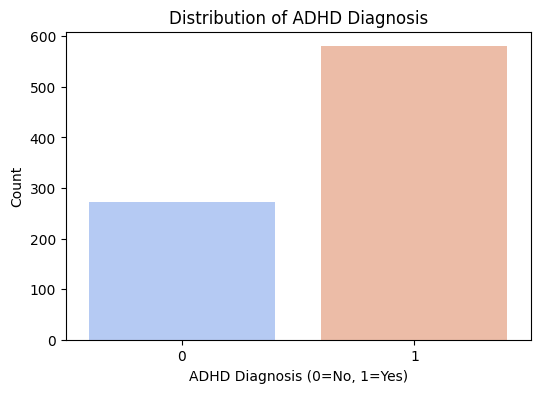

In [220]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df_merged["ADHD_Outcome"], palette="coolwarm")
plt.title("Distribution of ADHD Diagnosis")
plt.xlabel("ADHD Diagnosis (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()


## Exploring Correlation 

## Exploring Connectome Data

## Handling Brain Connectome Data:

Brain connectome data consists of **functional connectivity matrices** derived from fMRI scans. These matrices capture the correlation between different brain regions, providing insights into how brain activity is synchronized.

### 1️ Understanding the Connectome Data
- Each **row** represents a participant.
- Each **column** represents a **connection** between two brain regions.
- The values range from **-1 to 1**:
  - **Positive values**: Two regions activate together (strong functional connection).
  - **Negative values**: One region activates while the other deactivates (inverse relationship).
  - **Near zero**: No significant correlation between regions.


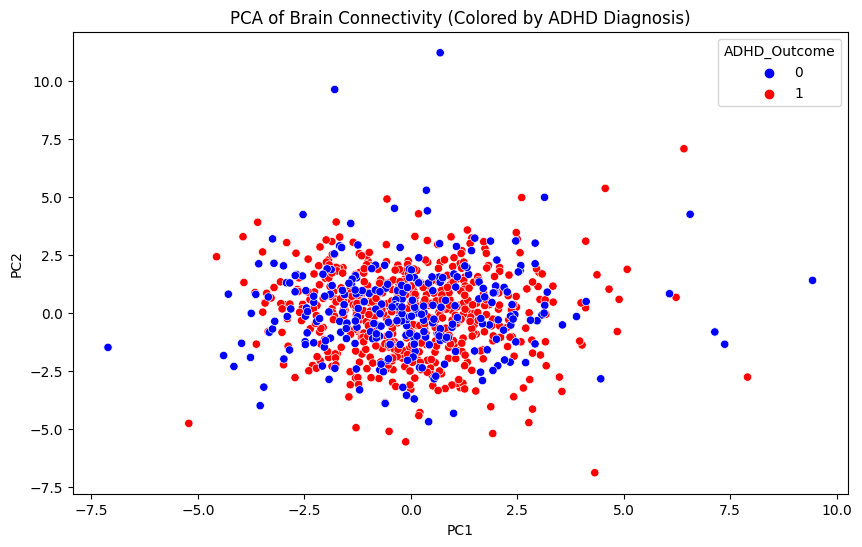

Variance explained by PC1: 0.86%
Variance explained by PC2: 0.83%


In [221]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Identify brain connectivity features
connectome_features = [col for col in df_merged.columns if col.startswith("0throw") or col.startswith("1throw")]

# Standardize the data
scaler = StandardScaler()
connectome_scaled = scaler.fit_transform(df_merged[connectome_features])

# Apply PCA
pca = PCA(n_components=50)
pca_result = pca.fit_transform(connectome_scaled)
pca_result = pca.fit_transform(connectome_scaled)

# Create DataFrame for visualization
df_pca = pd.DataFrame({
    "PC1": pca_result[:, 0],
    "PC2": pca_result[:, 1],
    "ADHD_Outcome": df_merged["ADHD_Outcome"]
})

# Scatter plot of PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PC1", y="PC2", hue="ADHD_Outcome", data=df_pca, palette=["blue", "red"])
plt.title("PCA of Brain Connectivity (Colored by ADHD Diagnosis)")
plt.show()

print(f"Variance explained by PC1: {pca.explained_variance_ratio_[0]*100:.2f}%")
print(f"Variance explained by PC2: {pca.explained_variance_ratio_[1]*100:.2f}%")


In [222]:
correlation = df_merged[connectome_features + ["ADHD_Outcome"]].corr()["ADHD_Outcome"].sort_values(ascending=False)
top_100_features = correlation.head(100).index.tolist()


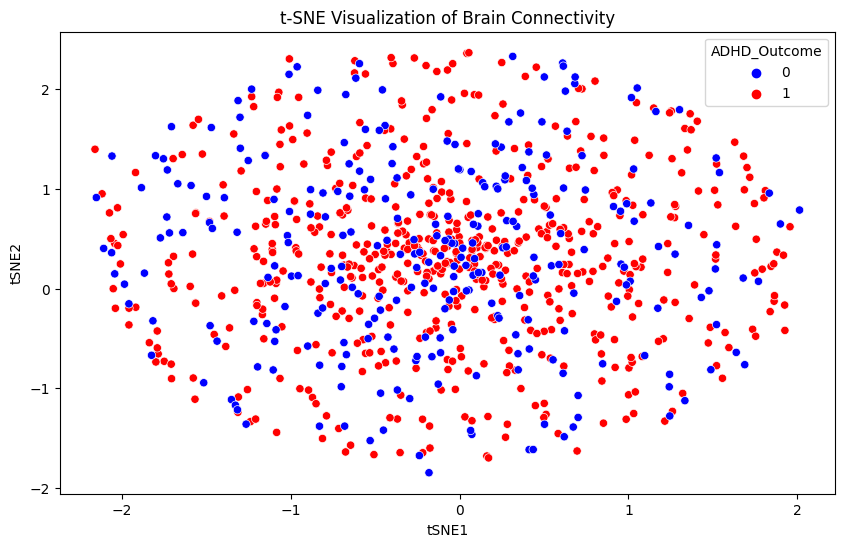

In [223]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(connectome_scaled)

df_tsne = pd.DataFrame({"tSNE1": tsne_result[:, 0], "tSNE2": tsne_result[:, 1], "ADHD_Outcome": df_merged["ADHD_Outcome"]})

plt.figure(figsize=(10, 6))
sns.scatterplot(x="tSNE1", y="tSNE2", hue="ADHD_Outcome", data=df_tsne, palette=["blue", "red"])
plt.title("t-SNE Visualization of Brain Connectivity")
plt.show()


In [224]:
# Analysis: No seperation or clustering between the two groups 


Top 15 Most Positively Correlated Brain Connections:
0throw_103thcolumn    0.129391
0throw_102thcolumn    0.107124
1throw_149thcolumn    0.096538
0throw_156thcolumn    0.094471
1throw_159thcolumn    0.092918
1throw_6thcolumn      0.089345
1throw_70thcolumn     0.086993
0throw_40thcolumn     0.083512
0throw_162thcolumn    0.082815
1throw_199thcolumn    0.081920
0throw_130thcolumn    0.080335
0throw_92thcolumn     0.069712
0throw_77thcolumn     0.069007
0throw_15thcolumn     0.068803
1throw_180thcolumn    0.068019
dtype: float64

Top 15 Most Negatively Correlated Brain Connections:
0throw_98thcolumn    -0.058709
1throw_111thcolumn   -0.059739
0throw_159thcolumn   -0.060124
1throw_55thcolumn    -0.066331
1throw_66thcolumn    -0.066685
1throw_8thcolumn     -0.069724
1throw_113thcolumn   -0.070138
0throw_69thcolumn    -0.071434
1throw_5thcolumn     -0.075572
1throw_188thcolumn   -0.076487
0throw_21thcolumn    -0.085712
1throw_101thcolumn   -0.086117
1throw_125thcolumn   -0.086655
1throw_3t

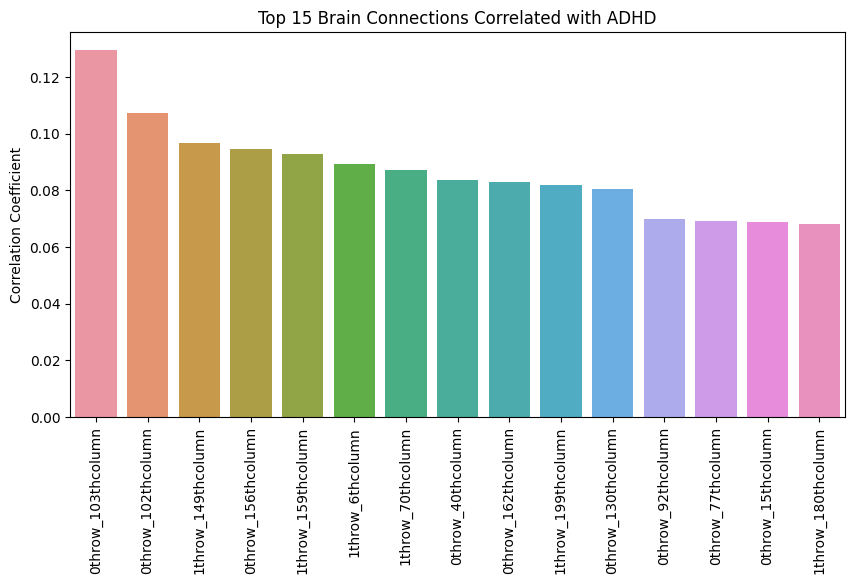

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify only connectome features
connectome_features = [col for col in df_merged.columns if col.startswith("0throw") or col.startswith("1throw")]

# Compute correlation of each connectome feature with ADHD outcome
connectome_correlation = df_merged[connectome_features].corrwith(df_merged["ADHD_Outcome"]).sort_values(ascending=False)

# Display top positively correlated features
print("\nTop 15 Most Positively Correlated Brain Connections:")
print(connectome_correlation.head(15))

# Display top negatively correlated features
print("\nTop 15 Most Negatively Correlated Brain Connections:")
print(connectome_correlation.tail(15))

# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x=connectome_correlation.head(15).index, y=connectome_correlation.head(15).values)
plt.xticks(rotation=90)
plt.title("Top 15 Brain Connections Correlated with ADHD")
plt.ylabel("Correlation Coefficient")
plt.show()


In [226]:
## GNN Exploration
#Due to low correlation between simple evaluation we need further exploration 

In [227]:
# !pip install torch torchvision torchaudio
# !pip install --no-cache-dir torch-scatter -f https://data.pyg.org/whl/torch-2.1.0+cu118.html
!pip install --no-cache-dir torch-sparse -f https://data.pyg.org/whl/torch-2.1.0+cu118.html
# !pip install --no-cache-dir torch-cluster -f https://data.pyg.org/whl/torch-2.1.0+cu118.html
# !pip install --no-cache-dir torch-spline-conv -f https://data.pyg.org/whl/torch-2.1.0+cu118.html
# !pip install --no-cache-dir torch-geometric


Looking in links: https://data.pyg.org/whl/torch-2.1.0+cu118.html


In [228]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import torch_geometric
# from torch_geometric.data import Data
# from torch_geometric.nn import GCNConv, GATConv
# from torch_geometric.loader import DataLoader
# import numpy as np
# import pandas as pd
# import networkx as nx
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

In [229]:
pip install torch-geometric

Note: you may need to restart the kernel to use updated packages.


In [230]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import Data, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Select only connectome features
connectome_features = [col for col in df_merged.columns if col.startswith("0throw") or col.startswith("1throw")]

# Standardize the connectivity data
scaler = StandardScaler()
connectome_data = scaler.fit_transform(df_merged[connectome_features])

# Convert to PyTorch tensor
X = torch.tensor(connectome_data, dtype=torch.float)
y = torch.tensor(df_merged["ADHD_Outcome"].values, dtype=torch.long)

# **Create Graphs Per Participant**
graph_list = []

for i in range(len(df_merged)):
    # Create adjacency matrix (fully connected graph for each participant)
    num_nodes = len(connectome_features)  # Each feature is a node
    edge_index = []

    for j in range(num_nodes):
        for k in range(num_nodes):
            if j != k:  # Avoid self-loops
                edge_index.append([j, k])

    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()

    # Create PyG Data object per participant
    graph_data = Data(x=X[i].unsqueeze(0), edge_index=edge_index, y=y[i].unsqueeze(0))
    graph_list.append(graph_data)

# **Train-Test Split**
train_data, test_data = train_test_split(graph_list, test_size=0.2, random_state=42)
train_loader = DataLoader(train_data, batch_size=8, shuffle=True)
test_loader = DataLoader(test_data, batch_size=8)

print(f"Total graphs: {len(graph_list)}")
print(f"Train samples: {len(train_data)}, Test samples: {len(test_data)}")


Total graphs: 853
Train samples: 682, Test samples: 171


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


- Total graphs: 853 → Each participant is represented as an individual graph.
- Train samples: 682 → 682 participants are in the training set.
- Test samples: 171 → 171 participants are in the test set.

In [231]:
## Defining the GNN Model

In [232]:
pip install torch-geometric

Note: you may need to restart the kernel to use updated packages.


In [233]:

import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.loader import DataLoader

# Define the GNN model
class GNNClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNNClassifier, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)  # First GCN layer
        self.conv2 = GCNConv(hidden_dim, hidden_dim)  # Second GCN layer
        self.fc = nn.Linear(hidden_dim, output_dim)  # Fully connected output layer

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)  # Graph convolution
        x = F.relu(x)  # Activation function
        x = self.conv2(x, edge_index)  # Second graph convolution
        x = F.relu(x)  # Activation function
        x = torch.mean(x, dim=0)  # Aggregate node features
        x = self.fc(x)  # Fully connected output
        return F.log_softmax(x, dim=-1)  # Log softmax for classification

# Set model parameters
input_dim = X.shape[1]  # Number of features (connectome features)
hidden_dim = 64
output_dim = 2  # Binary classification (ADHD or not)

# Initialize model, loss function, and optimizer
model = GNNClassifier(input_dim, hidden_dim, output_dim)
optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.NLLLoss()  # Negative Log Likelihood for classification


In [234]:
## Train the GNN Model

In [235]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [236]:
# Check tensor shapes
print(f"x shape: {batch.x.shape}, edge_index shape: {batch.edge_index.shape}, y shape: {batch.y.shape}")

# Check edge_index validity
num_nodes = batch.x.size(0)
if batch.edge_index.max() >= num_nodes or batch.edge_index.min() < 0:
    print("Invalid edge_index values detected!")

# Check for NaN/Inf values
for key, value in batch.items():
    if isinstance(value, torch.Tensor):
        if torch.isnan(value).any():
            print(f"NaN detected in {key}!")
        if torch.isinf(value).any():
            print(f"Inf detected in {key}!")

# Ensure y values are within range
print(f"Unique y labels: {batch.y.unique()}")


x shape: torch.Size([8, 397]), edge_index shape: torch.Size([2, 1257696]), y shape: torch.Size([8])
Invalid edge_index values detected!
Unique y labels: tensor([0, 1])


In [237]:
valid_mask = (batch.edge_index[0] < num_nodes) & (batch.edge_index[1] < num_nodes)
batch.edge_index = batch.edge_index[:, valid_mask]
print("Filtered invalid edges!")


Filtered invalid edges!


In [238]:

import torch

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    
    for batch in train_loader:
        batch = batch.to(device)

        # Debugging tensor properties
        print(f"x shape: {batch.x.shape}, edge_index shape: {batch.edge_index.shape}, y shape: {batch.y.shape}")

        # Validate edge_index
        num_nodes = batch.x.size(0)
        if batch.edge_index.max() >= num_nodes or batch.edge_index.min() < 0:
            print("Invalid edge_index values detected!")

        # Check for NaN/Inf values
        for key, value in batch.items():
            if isinstance(value, torch.Tensor):
                if torch.isnan(value).any():
                    print(f"NaN detected in {key}!")
                if torch.isinf(value).any():
                    print(f"Inf detected in {key}!")

        # Ensure target is on correct device
        batch.y = batch.y.to(device)
        optimizer.zero_grad()
        out = model(batch)  # Forward pass
        loss = loss_fn(out, batch.y)  # Compute loss

        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        total_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss:.4f}")


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.
